# PROJECT :- Customer Churn Prediction



## Business case
**Customer churn is a significant challenge for telecommunications companies, as it directly impacts revenue and profitability. Predicting which customers are likely to churn allows the company to take proactive measures to retain them, such as offering targeted incentives or improving customer service.**

### Domain Analysis

**The dataset comprises of a total of 13 columns and 7043 rows**

- **CustomerID:** Unique identifier for each customer
- **Gender:** Gender of the customer (Male/Female)
- **SeniorCitizen**Whether the customer is a senior citizen (1 for yes, 0 for no)
- **Partner:** Whether the customer has a partner (Yes/No)
- **Dependents:** Whether the customer has dependents (Yes/No)
- **Tenure:** Number of months the customer has stayed with the company
- **PhoneService:** Whether the customer has a phone service (Yes/No)
- **MultipleLines:** Whether the customer has multiple lines (Yes/No)
- **InternetService:** Type of internet service (DSL, Fiber optic, No)
- **MonthlyCharges:** Monthly charges of the customer
- **TotalCharges:** Total charges incurred by the customer
- **Churn:** Whether the customer churned or not (Yes/No)



### Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('customer_churn_data.csv')

In [3]:
data.shape

(7043, 13)

In [4]:
pd.reset_option('display.max_rows',None)

In [5]:
data

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,56.95,1889.5,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,84.80,1990.5,No
7039,7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,103.20,7362.9,No
7040,7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,29.60,346.45,No
7041,7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,74.40,306.6,Yes


### Removing unwanted column

#### The dataset now comprises of a total of 12 columns and 7043 rows

In [6]:
data1=data.copy()

In [7]:
data.shape

(7043, 13)

In [8]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,70.70,151.65,Yes


In [10]:
data.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,TotalCharges,Churn
2697,6461-SZMCV,Female,0,Yes,No,71,Yes,Yes,DSL,87.95,6365.35,No
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,19.35,1099.6,Yes
2131,5656-MJEFC,Male,0,Yes,Yes,42,No,No phone service,DSL,48.15,2032.3,No
6784,9546-KDTRB,Female,0,No,No,19,Yes,Yes,No,24.70,465.85,No
4789,0511-JTEOY,Female,0,No,No,1,Yes,No,Fiber optic,71.10,71.1,Yes
182,9367-WXLCH,Male,0,No,No,8,Yes,Yes,Fiber optic,84.50,662.65,Yes
6161,4343-EJVQB,Male,0,No,No,7,Yes,No,Fiber optic,74.35,533.6,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,19.85,,No
1297,6198-ZFIOJ,Female,0,No,No,5,Yes,Yes,Fiber optic,75.60,402.5,No
1981,0348-SDKOL,Female,0,Yes,No,58,Yes,Yes,Fiber optic,102.10,5885.4,Yes


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       7043 non-null   object 
 1   gender           7043 non-null   object 
 2   SeniorCitizen    7043 non-null   int64  
 3   Partner          7043 non-null   object 
 4   Dependents       7043 non-null   object 
 5   tenure           7043 non-null   int64  
 6   PhoneService     7043 non-null   object 
 7   MultipleLines    7043 non-null   object 
 8   InternetService  7043 non-null   object 
 9   MonthlyCharges   7043 non-null   float64
 10  TotalCharges     7043 non-null   object 
 11  Churn            7043 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 660.4+ KB


In [12]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
data.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,,No
freq,1,3555,3641,4933,6361,3390,3096,11,5174


In [14]:
data.select_dtypes(include=['int','float'])

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [15]:
data.select_dtypes(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,306.6,Yes


In [16]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## TASK - 1

## 1.	Data Preprocessing:
- Handle missing values.
- Encode categorical features.
- Scale numerical features.


In [17]:
data.shape

(7043, 12)

In [18]:
data.duplicated().sum()

0

### Handle missing values

In [19]:
data.isnull().sum()

customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

In [20]:
# checking the percentage of missing values
data.isnull().sum()/len(data)*100

customerID         0.0
gender             0.0
SeniorCitizen      0.0
Partner            0.0
Dependents         0.0
tenure             0.0
PhoneService       0.0
MultipleLines      0.0
InternetService    0.0
MonthlyCharges     0.0
TotalCharges       0.0
Churn              0.0
dtype: float64

### In this Dataset there is no missing values and no duplicated values are there.

In [21]:
# Replace empty strings with NaN
data['TotalCharges'] = data['TotalCharges'].replace(' ', pd.NA)

- By replacing empty strings with NaN before conversion,ensure that the conversion to numeric type can be performed without encountering errors. The NaN values will represent missing or undefined data in the 'TotalCharges' column.

In [22]:
# Convert the column to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

# Check for NaN values after conversion
nan_values = data['TotalCharges'][data['TotalCharges'].isna()]
print("NaN values after conversion:", nan_values)

NaN values after conversion: 488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64


In [23]:
data['TotalCharges'].isnull().sum()

11

In [24]:
data.loc[data['TotalCharges'].isnull()==True,'TotalCharges']=np.median(data.TotalCharges.dropna(axis=0))

In [25]:
data.isnull().sum()

customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       7043 non-null   object 
 1   gender           7043 non-null   object 
 2   SeniorCitizen    7043 non-null   int64  
 3   Partner          7043 non-null   object 
 4   Dependents       7043 non-null   object 
 5   tenure           7043 non-null   int64  
 6   PhoneService     7043 non-null   object 
 7   MultipleLines    7043 non-null   object 
 8   InternetService  7043 non-null   object 
 9   MonthlyCharges   7043 non-null   float64
 10  TotalCharges     7043 non-null   float64
 11  Churn            7043 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 660.4+ KB


### Encode Categorical Features

In [27]:
from sklearn.preprocessing import LabelEncoder


<Axes: >

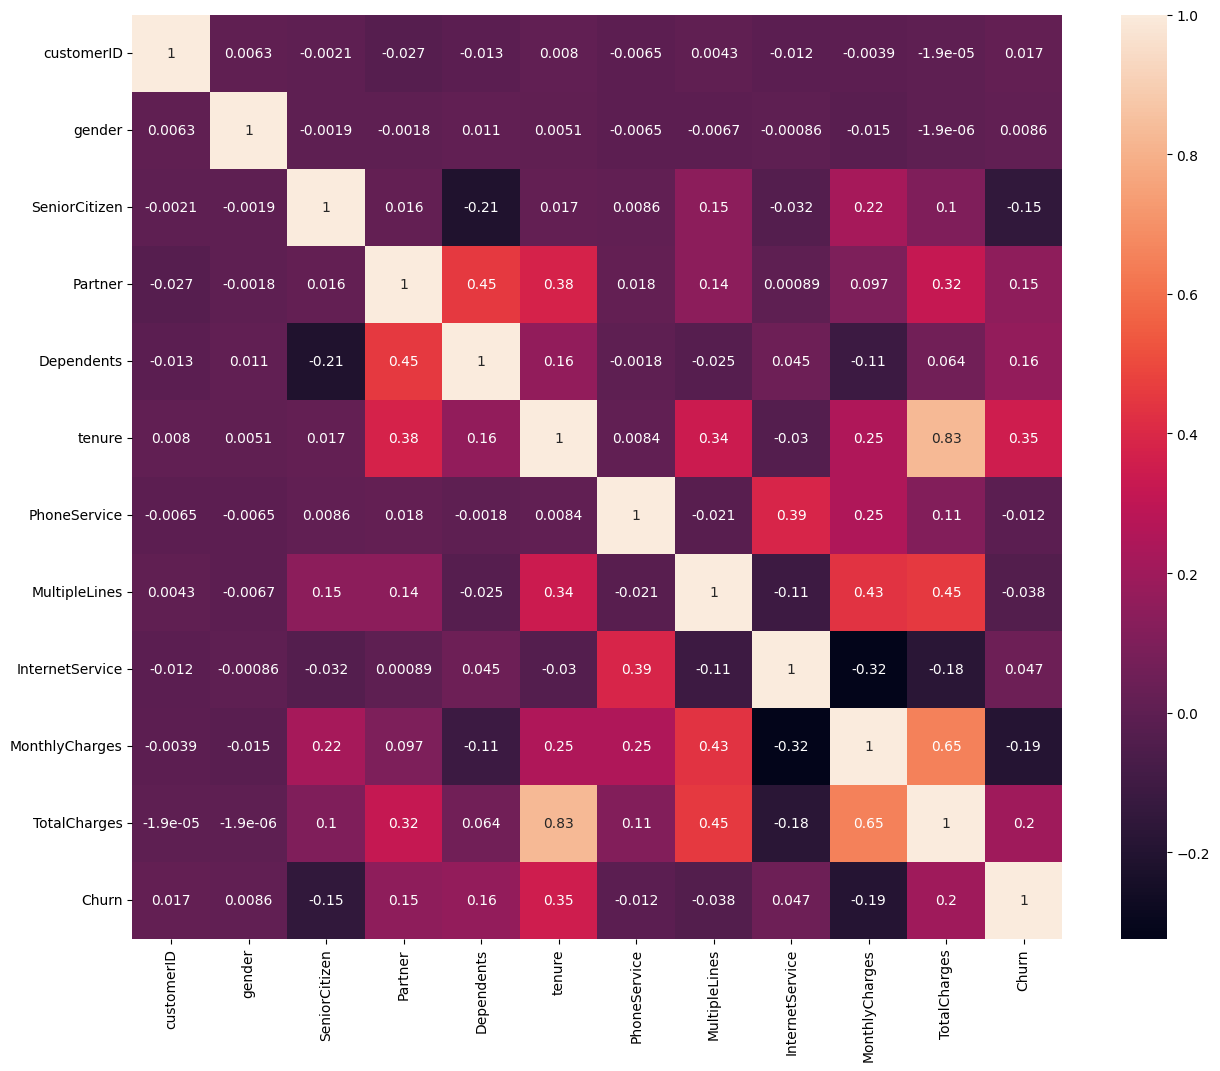

In [149]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)

In [28]:
lc = LabelEncoder()
data['customerID'] = lc.fit_transform(data['customerID'])


In [29]:
data['customerID'] = lc.fit_transform(data['customerID'])
data['gender'] = lc.fit_transform(data['gender'])
data['Dependents'] = lc.fit_transform(data['Dependents'])
data['Partner'] = lc.fit_transform(data['Partner'])
data['PhoneService'] = lc.fit_transform(data['PhoneService'])
data['MultipleLines'] = lc.fit_transform(data['MultipleLines'])
data['InternetService'] = lc.fit_transform(data['InternetService'])
data['customerID'] = lc.fit_transform(data['customerID'])


In [30]:
data['Churn']=data['Churn'].map({'Yes':0,'No':1})

In [31]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,29.85,29.85,1
1,3962,1,0,0,0,34,1,0,0,56.95,1889.50,1
2,2564,1,0,0,0,2,1,0,0,53.85,108.15,0
3,5535,1,0,0,0,45,0,1,0,42.30,1840.75,1
4,6511,0,0,0,0,2,1,0,1,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,84.80,1990.50,1
7039,1525,0,0,1,1,72,1,2,1,103.20,7362.90,1
7040,3367,0,0,1,1,11,0,1,0,29.60,346.45,1
7041,5934,1,1,1,0,4,1,2,1,74.40,306.60,0



### Scale numerical features.

#### If data is in continuous then we use standard scalar

 

In [32]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
data[['customerID','tenure','MonthlyCharges','TotalCharges']]=scale.fit_transform(data[['customerID','tenure','MonthlyCharges','TotalCharges']])


#### If data is in catagorical or discreate then we use min-max scalar

In [33]:
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()
data[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService']]=scale.fit_transform(data[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService' ]])

In [43]:
pd.reset_option('display.max_rows',None)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       7043 non-null   float64
 1   gender           7043 non-null   float64
 2   SeniorCitizen    7043 non-null   float64
 3   Partner          7043 non-null   float64
 4   Dependents       7043 non-null   float64
 5   tenure           7043 non-null   float64
 6   PhoneService     7043 non-null   float64
 7   MultipleLines    7043 non-null   float64
 8   InternetService  7043 non-null   float64
 9   MonthlyCharges   7043 non-null   float64
 10  TotalCharges     7043 non-null   float64
 11  Churn            7043 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 660.4 KB


## TASK - 2

## 2.	Model Development:
- Split the dataset into training and testing sets.
- Train a classification model to predict customer churn using Azure Machine Learning.
- Experiment with at least two different algorithms (e.g., Logistic Regression, Random Forest, etc.).
- Tune hyperparameters using cross-validation.


#### Split the dataset into training and testing sets.

In [35]:
x=data.drop('Churn',axis=1)

In [36]:
y=data['Churn']

In [37]:
x.shape,y.shape

((7043, 11), (7043,))

#### Train a classification model to predict customer churn using Azure Machine Learning.

In [38]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state=42,test_size=0.2)

In [39]:
x_train.shape,x_test.shape

((5634, 11), (1409, 11))

In [40]:
y_train.shape

(5634,)

In [41]:
y_test.shape

(1409,)

In [42]:
# importing logistic regression model
from sklearn.linear_model import LogisticRegression
#initilize the model
lr=LogisticRegression()

In [165]:
# fitting the x_train,y_train data in logistic regression model
lr.fit(x_train,y_train)

LogisticRegression()

In [166]:
# make predection using x_train,x_test
y_log_train_pred=lr.predict(x_train)# Train Model
y_log_test_pred=lr.predict(x_test)# Test Model

In [47]:
#Evaluation the Model
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score

In [169]:
#Evaluate Logistic Regression model:
print("Logistic Regression training set score:" , accuracy_score(y_train, y_log_train_pred))
print("Logistic Regression test set score:" , accuracy_score(y_test, y_log_test_pred))

Logistic Regression training set score: 0.7900248491302805
Logistic Regression test set score: 0.8069552874378992


In [170]:
y_test

185     0
2715    1
3825    1
1807    0
132     1
       ..
6366    1
315     1
2439    1
5002    1
1161    0
Name: Churn, Length: 1409, dtype: int64

In [171]:
y_log_test_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [57]:
recall_score(y_test,y_log_test_pred,average='weighted')

0.808374733853797

In [172]:
precision_score(y_test,y_log_test_pred,average='weighted')

0.7960195857480213

In [59]:
log_acc_score=accuracy_score(y_test,y_log_test_pred)
log_acc_score

0.808374733853797

In [60]:
f1_score(y_test,y_log_test_pred,average='weighted')

0.800189914136997

In [173]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr,x,y,cv=3,scoring='accuracy')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.79599659 0.79088586 0.78951853]
Cross validation Score: 0.7921336624835745
Std : 0.002787958432914896


In [174]:
cr=classification_report(y_test,y_log_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.69      0.49      0.57       373
           1       0.83      0.92      0.88      1036

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



### Hyperparameter tuning

In [68]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Create logistic regression model
logistic_regression = LogisticRegression()

# Define hyperparameters grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Print best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 10, 'penalty': 'l2'}
Best score: 0.7891377633762595


In [69]:
from sklearn.linear_model import LogisticRegression

# Instantiate a logistic regression model with specific hyperparameters
log_tuned = LogisticRegression(C=1, penalty='l2')

# Fit the model to the training data
log_tuned.fit(x_train, y_train)


LogisticRegression(C=1)

In [70]:
y_log_train_tuned= log_tuned.predict(x_train) # training model
y_log_test_tuned= log_tuned.predict(x_test) # testing model

In [71]:
#Evaluate Tuned SVC model:
print("logistic Tuned training set score:", accuracy_score(y_train, y_log_train_tuned))
print("logistic Tuned test set score:", accuracy_score(y_test, y_log_test_tuned))

SVC Tuned training set score: 0.7925097621583245
SVC Tuned test set score: 0.808374733853797


In [73]:
log_tuned_acc_score=accuracy_score(y_test,y_log_test_tuned)
log_tuned_acc_score

0.808374733853797

### KNN

In [63]:

from sklearn.neighbors import KNeighborsClassifier


In [64]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [65]:
y_knn_train_pred=knn.predict(x_train) # Training model
y_knn_test_pred=knn.predict(x_test) # Testing Model

In [66]:
#Evaluate knn model:
print("KNN training set score:" , accuracy_score(y_train, y_knn_train_pred))
print("KNN test set score:" , accuracy_score(y_test, y_knn_test_pred))


KNN training set score: 0.8283635072772453
KNN test set score: 0.772888573456352


In [67]:
print(precision_score(y_test,y_knn_test_pred,average='weighted'))
print(recall_score(y_test,y_knn_test_pred,average='weighted'))
print(accuracy_score(y_test,y_knn_test_pred))
print(f1_score(y_test,y_knn_test_pred,average='weighted'))

0.7600712224073587
0.772888573456352
0.772888573456352
0.7637487696467364


In [68]:
cr=classification_report(y_test,y_knn_test_pred)
print(cr)

              precision    recall  f1-score   support

       False       0.82      0.88      0.85      1036
        True       0.59      0.47      0.52       373

    accuracy                           0.77      1409
   macro avg       0.71      0.67      0.69      1409
weighted avg       0.76      0.77      0.76      1409



### SVC

In [57]:
from sklearn.svm import SVC

In [58]:
svc=SVC(probability=True)
svc.fit(x_train,y_train)

SVC(probability=True)

In [60]:
y_svc_train_pred=svc.predict(x_train) # Training model
y_svc_test_pred=svc.predict(x_test) # Testing Model

In [61]:
#Evaluate SVC model:
print("SVC training set score:" , accuracy_score(y_train, y_svc_train_pred))
print("SVC test set score:" , accuracy_score(y_test, y_svc_test_pred))


SVC training set score: 0.7953496627618033
SVC test set score: 0.7991483321504613


In [62]:
print(precision_score(y_test,y_svc_test_pred,average='weighted'))
print(recall_score(y_test,y_svc_test_pred,average='weighted'))
print(accuracy_score(y_test,y_svc_test_pred))
print(f1_score(y_test,y_svc_test_pred,average='weighted'))

0.7866520687218539
0.7991483321504613
0.7991483321504613
0.7814873585924447


In [63]:
print(classification_report(y_test,y_svc_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.43      0.53       373
           1       0.82      0.93      0.87      1036

    accuracy                           0.80      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409



In [64]:
### Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC  # Import Support Vector Classifier

# Create Support Vector Classifier model
svc_model = SVC(probability=True)  # Instantiate Support Vector Classifier

# Define hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10,20,30,100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=2, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Print best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 2 folds for each of 48 candidates, totalling 96 fits
Best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best score: 0.7946396876109336


In [70]:
# Instantiate a Support Vector Classifier model with specific hyperparameters
svc_tuned = SVC(C=10, gamma='auto', kernel='rbf',probability=True)

# Fit the model to the training data
svc_tuned.fit(x_train, y_train)

SVC(C=10, gamma='auto', probability=True)

In [71]:
y_svc_train_tuned= svc_tuned.predict(x_train) # training model
y_svc_test_tuned= svc_tuned.predict(x_test) # testing model

In [73]:
#Evaluate Tuned SVC model:
print("svc Tuned training set score:", accuracy_score(y_train, y_svc_train_tuned))
print("svc Tuned test set score:", accuracy_score(y_test, y_svc_test_tuned))

svc Tuned training set score: 0.7971246006389776
svc Tuned test set score: 0.8026969481902059


### Random forest

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [78]:
y_rfc_train_pred=rfc.predict(x_train)
y_rfc_test_pred=rfc.predict(x_test)

#### Evaluation

In [79]:
#Evaluate Random forest classifier model:
print("Random forest classifier training set score:" , accuracy_score(y_train, y_rfc_train_pred))
print("Random forest classifier test set score:" , accuracy_score(y_test, y_rfc_test_pred))

Random forest classifier training set score: 1.0
Random forest classifier test set score: 0.7806955287437899


In [80]:
print(precision_score(y_test,y_rfc_test_pred,average='weighted'))
print(recall_score(y_test,y_rfc_test_pred,average='weighted'))
print(accuracy_score(y_test,y_rfc_test_pred))
print(f1_score(y_test,y_rfc_test_pred,average='weighted'))

0.7676178392812396
0.7806955287437899
0.7806955287437899
0.7706380309634093


In [81]:
print(classification_report(y_test,y_rfc_test_pred))

              precision    recall  f1-score   support

       False       0.82      0.89      0.86      1036
        True       0.61      0.47      0.53       373

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



### Hyperparameter tuning

In [99]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest model
random_forest = RandomForestClassifier()

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=2, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Print best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 2 folds for each of 108 candidates, totalling 216 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.7923322683706071


In [100]:
# Instantiate a logistic regression model with specific hyperparameters
rf_log_tuned = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100)

# Fit the model to the training data
rf_log_tuned.fit(x_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=2)

In [101]:
y_log_train_tuned= rf_log_tuned.predict(x_train) # training model
y_log_test_tuned= rf_log_tuned.predict(x_test) # testing model

In [102]:
#Evaluate Tuned SVC model:
print("rf Tuned training set score:", accuracy_score(y_train, y_log_train_tuned))
print("rf Tuned test set score:", accuracy_score(y_test, y_log_test_tuned))

rf Tuned training set score: 0.8698970536031239
rf Tuned test set score: 0.8026969481902059


### XGB

In [86]:
from xgboost import XGBClassifier

In [87]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [88]:
y_xgb_train_pred=xgb.predict(x_train)
y_xgb_test_pred=xgb.predict(x_test)

#### Evaluation

In [89]:
#Evaluate XGB classifier model:
print("XGB classifier training set score:" , accuracy_score(y_train, y_xgb_train_pred))
print("XGB classifier test set score:" , accuracy_score(y_test, y_xgb_test_pred))


XGB classifier training set score: 0.9371671991480298
XGB classifier test set score: 0.7856635911994322


In [90]:
precision_score(y_test,y_xgb_test_pred,average='weighted')

0.775978734882166

In [91]:
recall_score(y_test,y_xgb_test_pred,average='weighted')

0.7856635911994322

In [92]:
xgb_acc_score=accuracy_score(y_test,y_xgb_test_pred)
xgb_acc_score

0.7856635911994322

In [93]:
f1_score(y_test,y_xgb_test_pred,average='weighted')

0.7790631171318536

In [94]:
print(classification_report(y_test,y_xgb_test_pred))

              precision    recall  f1-score   support

       False       0.83      0.88      0.86      1036
        True       0.61      0.51      0.56       373

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [95]:
from sklearn.naive_bayes import BernoulliNB

In [96]:
NBC = BernoulliNB()
NBC.fit(x_train, y_train)

BernoulliNB()

In [97]:
y_train_pred_NBC = NBC.predict(x_train) # training model
y_test_pred_NBC = NBC.predict(x_test) # test model

In [98]:
#Evaluate Multinomial Naive Bayes model:
print("Multinomial Naive Bayes training set score:", accuracy_score(y_train, y_train_pred_NBC))
print("Multinomial Naive Bayes test set score:", accuracy_score(y_test, y_test_pred_NBC))


Multinomial Naive Bayes training set score: 0.7263045793397231
Multinomial Naive Bayes test set score: 0.7381121362668559


In [74]:
import pickle

In [75]:
# open a file where you want to store the data
file=open('svc_model2.pkl','wb')

# dump information to that file
pickle.dump(svc_tuned,file)